In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pylab as plt

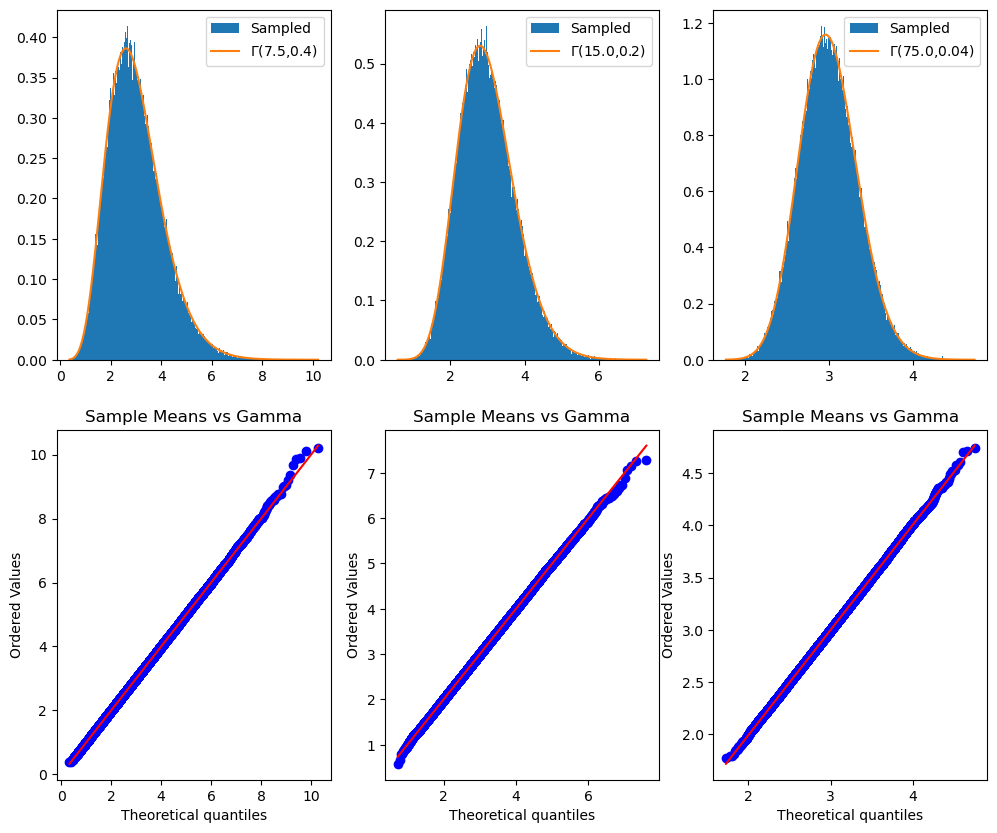

In [2]:
# Q1

# a
fig, axs = plt.subplots(2,3,figsize=(12,10))
N = [5, 10, 50]
k = 3
size = 100000

# b
chi_sample = [np.array([stats.chi2.rvs(k,size=(size,n))]) for n in N]

# c
chi_sample_mean = [value.mean(axis=2).reshape(size) for value in chi_sample]
for i in range(len(N)):
        axs[0,i].hist(chi_sample_mean[i],density=True, label=f"Sampled", bins="sqrt")

# d
x = [np.linspace(sample.min(),sample.max(),size) for sample in chi_sample_mean]
y = [stats.gamma.pdf(x[i],a=N[i]*k/2,scale=2/N[i]) for i in range(len(x))]
for i in range(len(N)):
    axs[0,i].plot(x[i],y[i], label=f"$\Gamma$({N[i]*k/2},{2/N[i]})")
    axs[0,i].legend()
    
# e
for i in range(len(N)):
    stats.probplot(chi_sample_mean[i], dist=stats.gamma(a=N[i]*k/2, scale=2/N[i]), plot=axs[1,i])
    axs[1,i].set_title(f"Sample Means vs Gamma")

fig.show()

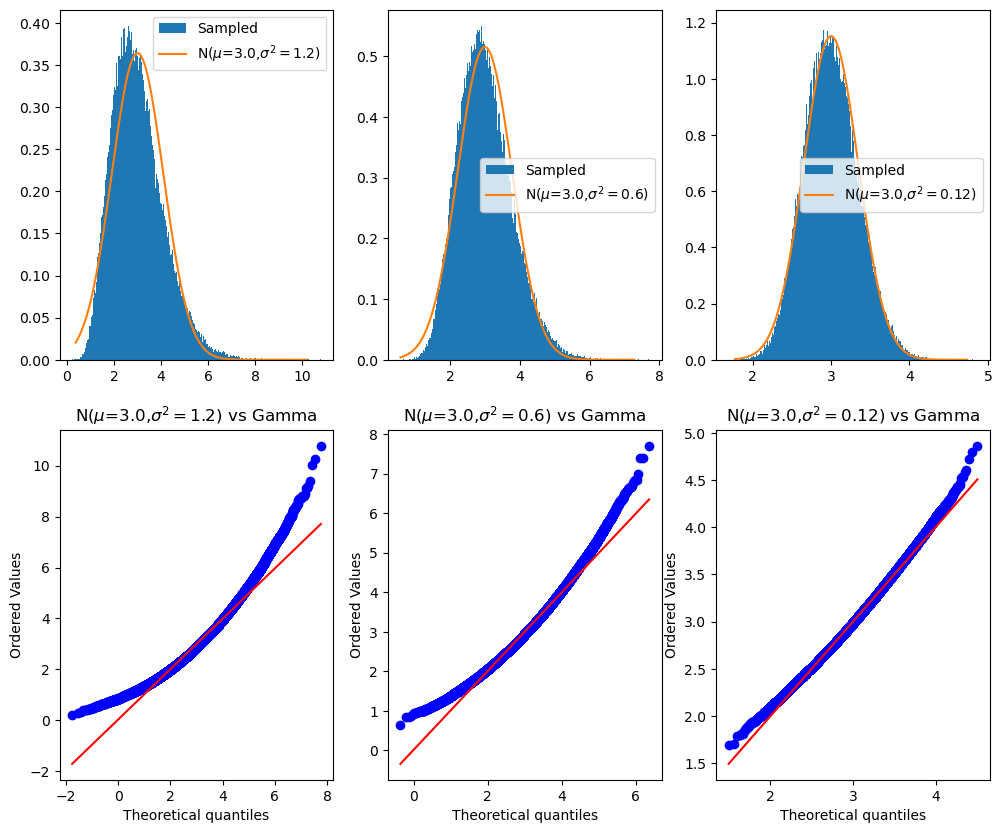

In [3]:
## Q2

# a
fig2, axs2 = plt.subplots(2,3,figsize=(12,10))
N = [5, 10, 50]
k = 3
size = 100000

# b
chi_sample = [np.array([stats.chi2.rvs(k,size=(size,n))]) for n in N]

# c
chi_sample_mean = [value.mean(axis=2).reshape(size) for value in chi_sample]
for i in range(len(N)):
        axs2[0,i].hist(chi_sample_mean[i],density=True, label=f"Sampled", bins="sqrt")

# d
approx = [stats.norm(loc=k, scale=np.sqrt(2*k/n)) for n in N]
y2 = [approx[i].pdf(x[i]) for i in range(len(N))]
for i in range(len(N)):
    axs2[0,i].plot(x[i],y2[i], label=f"N($\\mu$={approx[i].mean()},$\\sigma^2=${round(approx[i].var(),10)})")
    axs2[0,i].legend()
    
# e
for i in range(len(N)):
    stats.probplot(chi_sample_mean[i], dist=approx[i], plot=axs2[1,i])
    axs2[1,i].set_title(f"N($\\mu$={approx[i].mean()},$\\sigma^2=${round(approx[i].var(),10)}) vs Gamma")
    
    
fig.show()

For which value N is the approximate density of sample means given by the CLT indistinguishable from the actual density you've plotted in Q1?

N=50

**Question 3**

let $X_i$ be the number of COVID-positive children in a class of 30. Where, $X_i$ ~ Binom(30,p).

$H_0$: p=0.1 for $X_i$

In [4]:
bin_120_01 = stats.binom(120,0.1)

cases_20 = bin_120_01.pmf(20)
cases_under_20 = bin_120_01.cdf(19)
cases_over_inc_20 = 1 - cases_under_20
print("Probability under H0 of oberserving 20 cases with 120 pupils: ", cases_20)
print("Probability under H0 of oberserving at least as extreme as 20 cases with 120 pupils: ",cases_over_inc_20)

Probability under H0 of oberserving 20 cases with 120 pupils:  0.007825579711977095
Probability under H0 of oberserving at least as extreme as 20 cases with 120 pupils:  0.015766771960374126


Based on the above, We have sufficient evidence to reject $H_0$ at 95% confidence with either a 1-tailed test or 2-tailed test.

For this, I will say that I am doing a 1-tailed test where our $H_1:$ p > 0.1 some p. This suggests that the probability of a child testing positive for COVID is greater than the current model says. So, I infer that the epidemic is getting worse with more cases.

Binomial is a discrete distribution and with this large an N, it is better to approximate with a Normal as the calculations become increasing difficult.

**1.** 

$E[X_i] = 30*p$

Which under our $H_0$ is given by:

$E[X_i] = 3$

and our distribution which is given by the mean of the sample distributions is:

$\overline{X} = \frac{1}{n}\sum_{i=1}^{n} X_i = \frac{1}{n}Binom(30n,0.1)$

Using the fact that we have 300 classes of size 30:

$\overline{X} = \frac{1}{300}\sum_{i=1}^{300} X_i = \frac{1}{300}Binom(9000,0.1)$

**2.** Observed sample mean:

Under the observation of 945, our observed mean is given by $\frac{945}{900} = 3.15$


**3.** The sample size:

We have 300 classes of size 30, so our sample size is 300.

**4.** The Variance of $Binom(30,p)$ is:

$Var[Binom(30,p)] = 30p(1-p)$

By our $H_0$, we have that p=0.1, so:


$Var[Binom(30,p=0.1)] = 30*0.1*(1-0.1) = 2.7$

So, we will compute the mean distribution over these distributions.

So, let $X_i$ = Binom(30, 0.1) (by our $H_0$) i.i.d.

$E[\overline{X}] = E[\frac{1}{n}\sum_{i=1}^{n} X_i] = E[X_i]$

$Var[\overline{X}] = Var[\frac{1}{n}\sum_{i=1}^{n} X_i] = \frac{1}{n} Var[X_i]$

In the 2 equations above, the last equality is given the fact that the $X_i$s are i.i.d..

Then $\overline{X} = \frac{1}{300}\sum_{i=1}^{300} X_i = \frac{1}{300}Binom(9000,0.1)$

$E[X_i] = 30 * 0.1 = 3$

$Var[X_i] = 30 * 0.1 * 0.9 = 2.7$

$E[\overline{X}] = E[X_i] = 3$

$Var[\overline{X}] = \frac{1}{300} * Var[X_i] = 0.009$

So, we can say that:
$\overline{X} \approx$ ~ $N(3, 0.009)$

This means that our Z-score is:

$Z = \frac{X_t - E[\overline{X}]}{Std[\overline{X}]} = \frac{\sqrt{n}(X_t - E[X_i])}{Std[X_i]}$

Where $X_t$ is our observation. Our observation is given by:

$X_t = \frac{945}{300} = 3.15$

So, given our $H_0$ and our observation, we get our Z-score as:

$z = \frac{3.15 - 3}{\sqrt{0.009}} = \frac{\sqrt{300}(3.15 - 3)}{\sqrt{2.7}} \approx 1.58113883$

where $Z$ ~ $N(0,1)$.

In [5]:
z = (3.15 - 3)/np.sqrt(0.009)
z

1.5811388300841889

In [6]:
p_score = 1 - stats.norm.cdf(z)
p_score

0.056923149003329065

First, let us transform our input X = 945 to the mean over the $\overline{X}$ distribution:

So, our $X_{t} = \frac{945}{300} = 3.15$

Thus our Z-score for this is given by:
$z = \frac{3.15 - 3}{\sqrt{0.009}} \approx 1.58$

Thus, our computation is:
$p(\overline{X} \ge 945) = p(Z \ge z) = p(Z \ge 1.58) = 1 - \Phi(1.58) = 1 - 0.9430768 = 0.056923$

Doing a 1-tailed test, we can say that there is insufficient evidence to reject $H_{0}$ as the p value of 0.0569... is greater than 1-0.95 = 0.05.

Based on this, we can say with 95% confidence the epidemic is not getting worse based on the observation.

The previous small-scale trial and this trial have differing results, with small scale one saying that the epidemic is getting worse and this larger-scale trial saying the epidemic is not getting worse, I believe this to be due to the fact that there is insufficient data in the small scale trial to be representative of the population.